<a href="https://colab.research.google.com/github/Giovannacm/digital-image-processing-msc/blob/main/PID_Aula8_Implementacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade Estadual Paulista - UNESP

Programa de Pós-Graduação em Ciência da Computação

**Processamento de Imagens Digitais**

Professor Leandro Alves Neves

Alunos: 
* Giovanna Carreira Marinho;
* Guilherme Francisco de Andrade Campos;
* Julia Rodrigues Gubolin;
* Thales Ricardo de Souza Lopes.

**Aula 08 - Filtragem no Domínio da Frequência e Tranformada de Fourier**

Aplique os ruídos impulsivo e gaussianos sobre duas imagens monocromática (exemplificadas no exercício 2). Em seguida, implemente e execute a DFT sobre as
imagens com ruídos. Plote o espectro de Fourier. Aplique dois filtros no domínio da frequência para suavizar os ruídos inseridos previamente. Apresente os espectros de Fourier antes e após as inserções de ruídos, bem como as imagens reconstruídas após os processos de filtragem. Explique detalhadamente cada etapa e os filtros propostos.

In [ ]:
import skimage.io, skimage.exposure, skimage.util
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

Definição de algumas proriedades das imagens que serão geradas abaixo.

In [ ]:
image_height = 256
image_width = 256
gray_levels = 256
depth_levels = gray_levels - 1

# Criação das imagens

As imagens escolhidas foram as imagens (b) e (c)

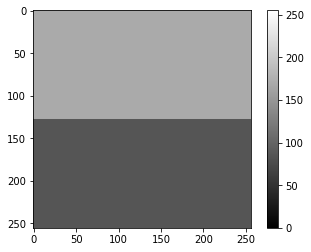

In [ ]:
image_b = np.zeros((image_height, image_width), dtype=np.uint8)

gray_shades = 3
image_b[:int(image_height/2) , :] = int(depth_levels / gray_shades) * 2
image_b[int(image_height/2):, :] = int(depth_levels / gray_shades) * 1

plt.imshow(image_b, cmap='gray')
plt.clim(0, depth_levels)
plt.colorbar()

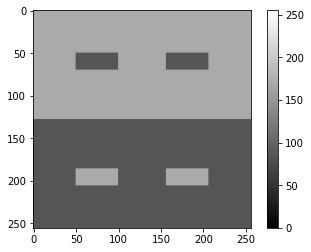

In [ ]:
image_c = np.zeros((image_height, image_width), dtype=np.uint8)

gray_shades = 3
image_c[:int(image_height/2) , :] = int(depth_levels / gray_shades) * 2
image_c[int(image_height/2):, :] = int(depth_levels / gray_shades) * 1

image_c[50:70, 50:100] = int(depth_levels / gray_shades) * 1
image_c[50:70, image_width-100:image_width-50] = int(depth_levels / gray_shades) * 1

image_c[image_height-70:image_height-50 , 50:100] = int(depth_levels / gray_shades) * 2
image_c[image_height-70:image_height-50 , image_width-100:image_width-50] = int(depth_levels / gray_shades) * 2

plt.imshow(image_c, cmap='gray')
plt.clim(0, depth_levels)
plt.colorbar()

# Espectro de Fourier da imagem original

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


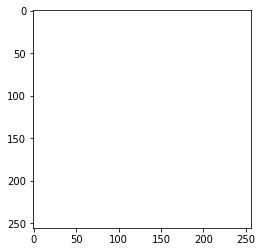

In [ ]:
image_b_dft = np.fft.fftshift(np.fft.fft2(image_b))
plt.imshow(np.log(abs(image_b_dft)), cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


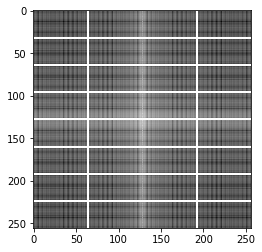

In [ ]:
image_c_dft = np.fft.fftshift(np.fft.fft2(image_c))
plt.imshow(np.log(abs(image_c_dft)), cmap='gray')

# Aplicação dos ruídos impulsivo e gaussiano

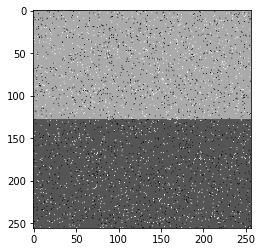

In [ ]:
image_b_noised_sp = skimage.util.random_noise(image_b, mode='s&p', amount=0.05)*255
plt.imshow(image_b_noised_sp, cmap='gray', vmin=0, vmax=255)

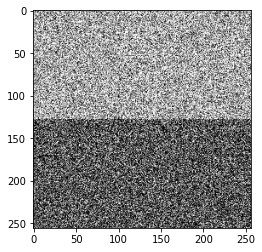

In [ ]:
image_b_noised_gaussian = skimage.util.random_noise(image_b, mode='gaussian', mean=0, var=0.1)*255
plt.imshow(image_b_noised_gaussian, cmap='gray', vmin=0, vmax=255)

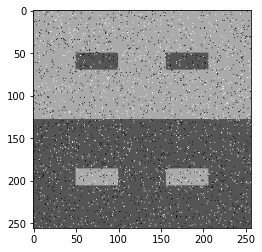

In [ ]:
image_c_noised_sp = skimage.util.random_noise(image_c, mode='s&p', amount=0.05)*255
plt.imshow(image_c_noised_sp, cmap='gray', vmin=0, vmax=255)

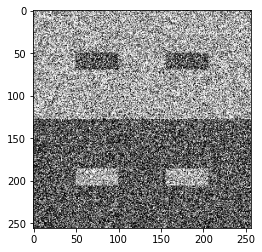

In [ ]:
image_c_noised_gaussian = skimage.util.random_noise(image_c, mode='gaussian', mean=0, var=0.1)*255
plt.imshow(image_c_noised_gaussian, cmap='gray', vmin=0, vmax=255)

# Espectro de Fourier das imagens com ruído

## Ruído gaussiano em (b) e (c)

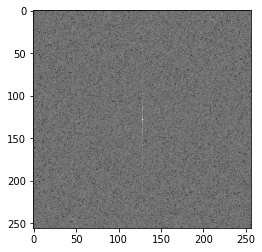

In [ ]:
image_b_dft_gaussian = np.fft.fftshift(np.fft.fft2(image_b_noised_gaussian))
plt.imshow(np.log(abs(image_b_dft_gaussian)), cmap='gray')

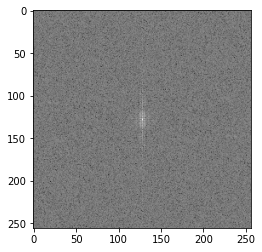

In [ ]:
image_c_dft_gaussian = np.fft.fftshift(np.fft.fft2(image_c_noised_gaussian))
plt.imshow(np.log(abs(image_c_dft_gaussian)), cmap='gray')

## Ruído impulsivo em (b) e (c)

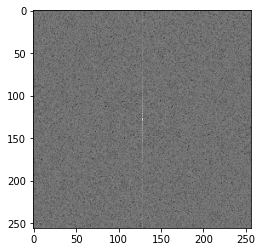

In [ ]:
image_b_dft_sp = np.fft.fftshift(np.fft.fft2(image_b_noised_sp))
plt.imshow(np.log(abs(image_b_dft_sp)), cmap='gray')

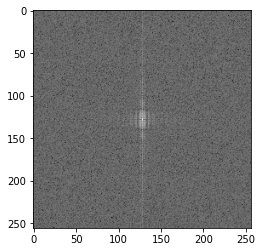

In [ ]:
image_c_dft_sp = np.fft.fftshift(np.fft.fft2(image_c_noised_sp))
plt.imshow(np.log(abs(image_c_dft_sp)), cmap='gray')

# Aplicando a DFT sobre as imagens com ruído

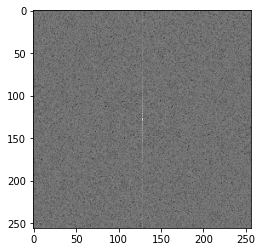

In [ ]:
image_b_noised_sp_dft = np.fft.fftshift(np.fft.fft2(image_b_noised_sp))
plt.imshow(np.log(abs(image_b_noised_sp_dft)), cmap='gray')

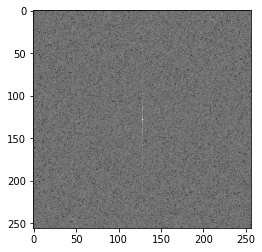

In [ ]:
image_b_noised_gaussian_dft = np.fft.fftshift(np.fft.fft2(image_b_noised_gaussian))
plt.imshow(np.log(abs(image_b_noised_gaussian_dft)), cmap='gray')

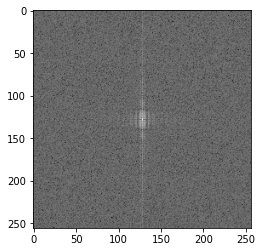

In [ ]:
image_c_noised_sp_dft = np.fft.fftshift(np.fft.fft2(image_c_noised_sp))
plt.imshow(np.log(abs(image_c_noised_sp_dft)), cmap='gray')

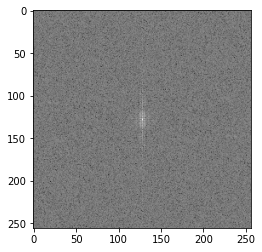

In [ ]:
image_c_noised_gaussian_dft = np.fft.fftshift(np.fft.fft2(image_c_noised_gaussian))
plt.imshow(np.log(abs(image_c_noised_gaussian_dft)), cmap='gray')

# Aplicação dos filtros no domínio da frequência

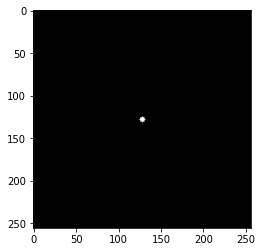

In [ ]:
linhas, colunas = image_b.shape
mascara = np.zeros((linhas, colunas))
raio = 3
centro = [int(linhas/2), int(colunas/2)]
x, y = np.ogrid[:linhas, :colunas]
circulo = (x - centro[0]) ** 2 + (y - centro[1]) ** 2 <= raio*raio
mascara[circulo] = 1 #filtro passa baixa
plt.imshow(mascara, cmap='gray')

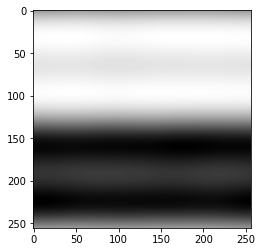

In [ ]:
image_b_noised_sp_dft_masked = image_b_noised_sp_dft * mascara
image_b_noised_sp_ishift = np.fft.ifftshift(image_b_noised_sp_dft_masked)
image_b_noised_sp_back = np.fft.ifft2(image_b_noised_sp_ishift)
plt.imshow(np.log(abs(image_b_noised_sp_back)), cmap='gray')

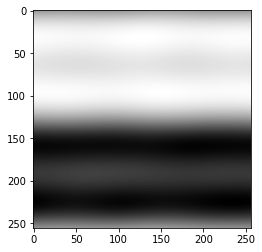

In [ ]:
image_b_noised_gaussian_dft_masked = image_b_noised_gaussian_dft * mascara
image_b_noised_gaussian_ishift = np.fft.ifftshift(image_b_noised_gaussian_dft_masked)
image_b_noised_gaussian_back = np.fft.ifft2(image_b_noised_gaussian_ishift)
plt.imshow(np.log(abs(image_b_noised_gaussian_back)), cmap='gray')

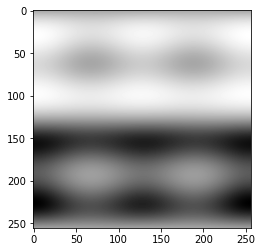

In [ ]:
image_c_noised_sp_dft_masked = image_c_noised_sp_dft * mascara
image_c_noised_sp_ishift = np.fft.ifftshift(image_c_noised_sp_dft_masked)
image_c_noised_sp_back = np.fft.ifft2(image_c_noised_sp_ishift)
plt.imshow(np.log(abs(image_c_noised_sp_back)), cmap='gray')

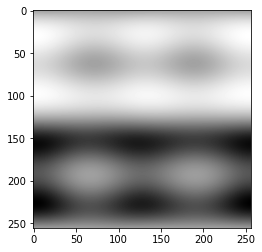

In [ ]:
image_c_noised_gaussian_dft_masked = image_c_noised_gaussian_dft * mascara
image_c_noised_gaussian_ishift = np.fft.ifftshift(image_c_noised_gaussian_dft_masked)
image_c_noised_gaussian_back = np.fft.ifft2(image_c_noised_gaussian_ishift)
plt.imshow(np.log(abs(image_c_noised_gaussian_back)), cmap='gray')

### Gaussiano

Escolher um dos itens abaixo para compilar e, após isso, compilar o código do filtro 

In [ ]:
F = np.fft.fft2(image_c_noised_sp)

In [ ]:
F = np.fft.fft2(image_c_noised_gaussian)

In [ ]:
F = np.fft.fft2(image_b_noised_sp)

In [ ]:
F = np.fft.fft2(image_b_noised_sp)

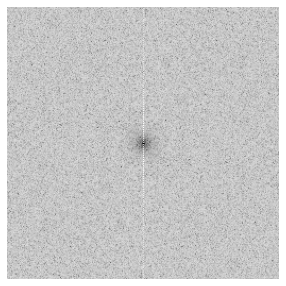

In [ ]:
# Dominio da frequencia
FDF = np.fft.fftshift(F)

# Filtro Gaussaino
M,N = image_c_noised_gaussian_back.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

HPF = 1 - H
GDF = FDF * HPF
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(GDF)), cmap='gray')
plt.axis('off')
plt.show()

# Processo com outra imagem

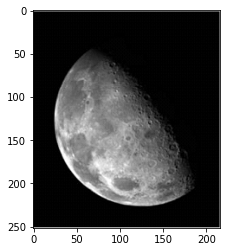

In [ ]:
moon_image = skimage.io.imread('/content/Moon.tif', as_gray=True)
plt.imshow(moon_image, cmap='gray')

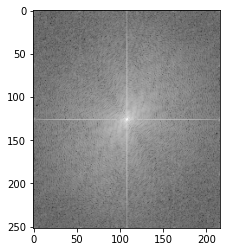

In [ ]:
moon_image_dft = np.fft.fftshift(np.fft.fft2(moon_image))
plt.imshow(np.log(abs(moon_image_dft)), cmap='gray')

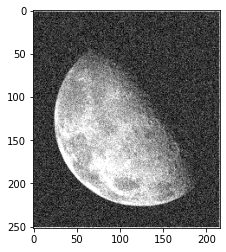

In [ ]:
moon_image_noised_gaussian = skimage.util.random_noise(moon_image, mode='gaussian', mean=0.2, var=0.01)*255
plt.imshow(moon_image_noised_gaussian, cmap='gray', vmin=0, vmax=255)

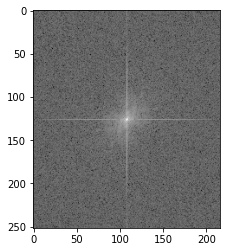

In [ ]:
moon_image_noised_gaussian_dft = np.fft.fftshift(np.fft.fft2(moon_image_noised_gaussian))
plt.imshow(np.log(abs(moon_image_noised_gaussian_dft)), cmap='gray')

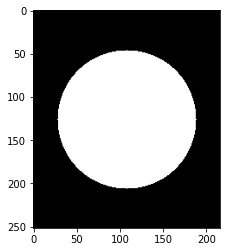

In [ ]:
linhas, colunas = moon_image.shape
mascara_2 = np.zeros((linhas, colunas))
raio = 80
centro = [int(linhas/2), int(colunas/2)]
x, y = np.ogrid[:linhas, :colunas]
circulo = (x - centro[0]) ** 2 + (y - centro[1]) ** 2 <= raio*raio
mascara_2[circulo] = 1 #filtro passa baixa
plt.imshow(mascara_2, cmap='gray')

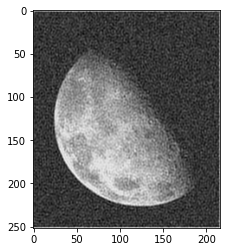

In [ ]:
moon_image_noised_gaussian_dft_masked = moon_image_noised_gaussian_dft * mascara_2
moon_image_noised_gaussian_ishift = np.fft.ifftshift(moon_image_noised_gaussian_dft_masked)
moon_image_noised_gaussian_back = np.fft.ifft2(moon_image_noised_gaussian_ishift)
plt.imshow(moon_image_noised_gaussian_back.real, cmap='gray')